# **Проект: статистическое исследование данных**

 **Цель проекта: проанализировать данные популярного сервиса аренды самокатов GoFast и проверить некоторые гипотезы, которые могут помочь бизнесу вырасти.**

 **Задачи проекта - проверка следуюших гипотез:**
 
1. Тратят ли пользователи с подпиской больше времени на поездки?

2. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 
3130 метров (оптимальное расстояние с точки зрения износа самоката)? 

3. Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.


 **Ход исследования:**

1. Выгрузка данных

2. Предобработка данных

3. Исследовательский анализ данных

4. Объединение данных

5. Подсчет выручки

6. Проверка гипотез

7. Общий вывод


**Описание данных:**

В основных данных есть информация о пользователях, их поездках и подписках.

**Пользователи — users_go.csv**

**user_id**	- уникальный идентификатор пользователя

**name** - имя пользователя

**age**	- возраст

**city** -	город

**subscription_type** -	тип подписки (free, ultra)

**Поездки — rides_go.csv**

**user_id** -	уникальный идентификатор пользователя

**distance** -	расстояние, которое пользователь проехал в текущей сессии (в метрах)

**duration** -	продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»

**date** -	дата совершения поездки

**Подписки — subscriptions_go.csv**

**subscription_type** -	тип подписки

**minute_price** -	стоимость одной минуты поездки по данной подписке

**start_ride_price** -	стоимость начала поездки

**subscription_fee** -	стоимость ежемесячного платежа


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

### Шаг 1. Загрузка данных ###

In [2]:
data_users = pd.read_csv ('/datasets/users_go.csv')

In [3]:
data_users.head()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [4]:
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [5]:
data_rides = pd.read_csv ('/datasets/rides_go.csv')

In [6]:
data_rides.head()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [7]:
data_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [8]:
data_subscriptions_go = pd.read_csv ('/datasets/subscriptions_go.csv')

In [9]:
data_subscriptions_go.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [10]:
data_subscriptions_go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


### Шаг 2. Предобработка данных ###

In [11]:
data_rides['date'] = pd.to_datetime(data_rides['date'])

In [12]:
data_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


In [13]:
data_rides['date'].dt.year.unique()

array([2021])

Данные представлены только за 2021 год

In [14]:
data_rides['month'] = pd.to_datetime(data_rides['date']).dt.month

In [15]:
data_rides.head()

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


In [16]:
data_rides.isna().sum()

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

In [17]:
data_rides.head()

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


In [18]:
data_users.duplicated().sum()

31

In [19]:
data_users.loc[data_users.duplicated()]

,user_id,name,age,city,subscription_type
1534,293,Агата,26,Краснодар,ultra
1535,16,Амалия,27,Краснодар,ultra
1536,909,Константин,20,Екатеринбург,free
1537,403,Полина,19,Сочи,ultra
1538,908,Рустам,30,Тюмень,free
1539,43,Стефания,22,Омск,ultra
1540,127,Павел,25,Пятигорск,ultra
1541,659,Злата,27,Ростов-на-Дону,ultra
1542,204,Руслан,30,Пятигорск,ultra
1543,153,Герман,23,Москва,ultra


In [20]:
data_users = data_users.drop_duplicates().reset_index(drop = True)

In [21]:
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1534 non-null   int64 
 1   name               1534 non-null   object
 2   age                1534 non-null   int64 
 3   city               1534 non-null   object
 4   subscription_type  1534 non-null   object
dtypes: int64(2), object(3)
memory usage: 60.0+ KB


In [22]:
data_rides.duplicated().sum()

0

In [23]:
data_rides.isna().sum()

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

In [24]:
data_subscriptions_go.duplicated().sum()

0

In [25]:
data_subscriptions_go.isna().sum()

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

В ходе предобработки данных пропущенные значения не выявлены. В данных о пользователях выявлен 31 дубликат. Дуюликаты удалены. В остальных файлах дубликатов не выявлено

### Шаг 3. Исследовательский анализ данных

In [27]:
data_rides['distance'] = data_rides['distance'].round(2)
data_rides.head()

,user_id,distance,duration,date,month
0,1,4409.92,25.599769,2021-01-01,1
1,1,2617.59,15.816871,2021-01-18,1
2,1,754.16,6.232113,2021-04-20,4
3,1,2694.78,18.511000,2021-08-11,8
4,1,4028.69,26.265803,2021-08-28,8


In [28]:
data_rides['duration'].min()

0.5

In [29]:
data_rides['duration'].max()

40.82396261922424

Минимальное время поездки - 0,5 минуты. Маловато конечно, но может быть у пользователя изменились планы.
Максимальное время поздки - 40,8 мин. Вполне вероятно для прогулки на самокате.

In [30]:
data_users_city = data_users.pivot_table(
    index = ['city'], values = 'user_id', aggfunc = 'count').sort_values(by = 'user_id', ascending = False)
data_users_city['share'] = data_users_city['user_id'] / len(data_users)
data_users_city['share'] = data_users_city['share'].map('{:.1%}'.format)
data_users_city

,user_id,share
city,,
Пятигорск,219,14.3%
Екатеринбург,204,13.3%
Ростов-на-Дону,198,12.9%
Краснодар,193,12.6%
Сочи,189,12.3%
Омск,183,11.9%
Тюмень,180,11.7%
Москва,168,11.0%


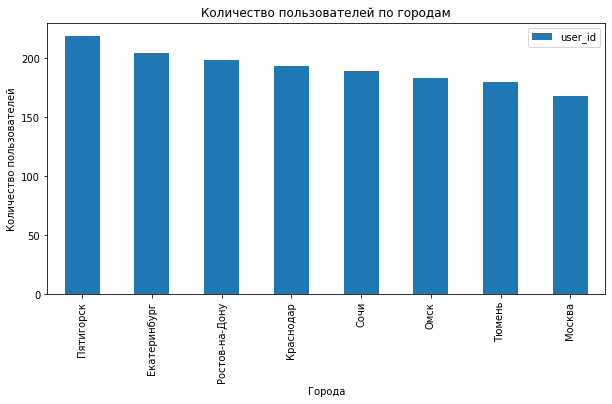

In [31]:
data_users_city.plot(kind='bar', figsize=(10, 5))

plt.title('Количество пользователей по городам')
plt.xlabel('Города')
plt.ylabel('Количество пользователей')

plt.show()

Больше всего пользователей сервиса аренды самокатов в Пятигорске, меньше всего - в Москве

In [32]:
data_users_type = data_users.pivot_table(
    index = ['subscription_type'], values = 'user_id', aggfunc = 'count').sort_values(by = 'user_id', ascending = False)
data_users_type['share'] = data_users_type['user_id'] / len(data_users)
data_users_type['share'] = data_users_type['share'].map('{:.1%}'.format)
data_users_type

,user_id,share
subscription_type,,
free,835,54.4%
ultra,699,45.6%


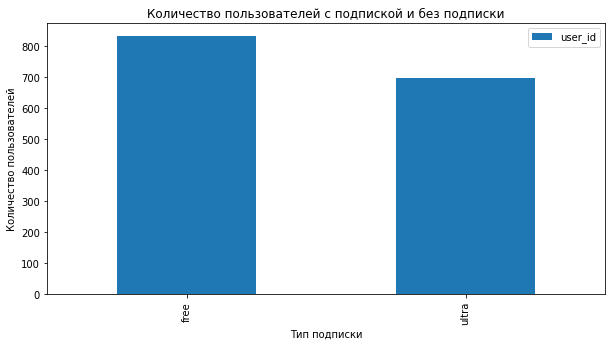

In [33]:
data_users_type.plot(kind='bar', figsize=(10, 5))

plt.title('Количество пользователей с подпиской и без подписки')
plt.xlabel('Тип подписки')
plt.ylabel('Количество пользователей')

plt.show()

Количество пользователей без подписки больше и составляет 54,4%.

In [35]:
data_users_age = data_users.pivot_table(
    index = ['age'], values = 'user_id', aggfunc = 'count').sort_values(by = 'age', ascending = True)
data_users_age['share'] = data_users_age['user_id'] / len(data_users)
data_users_age['share'] = data_users_age['share'].map('{:.1%}'.format)
data_users_age

,user_id,share
age,,
12,4,0.3%
13,8,0.5%
14,9,0.6%
15,13,0.8%
16,19,1.2%
17,26,1.7%
18,46,3.0%
19,47,3.1%
20,71,4.6%


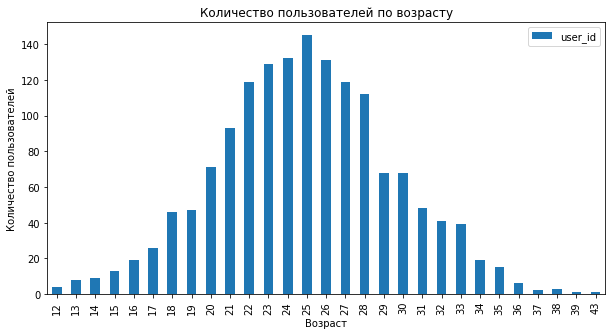

In [36]:
data_users_age.plot(kind='bar', figsize=(10, 5))

plt.title('Количество пользователей по возрасту')
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')

plt.show()

In [37]:
data_users['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

Наибольшее количество пользователей приходится на возраст с 21 до 28 лет. Средний возраст пользователей - 25 лет. Самые младшие пользователи - 12 лет, самые старшие - 43 года

In [38]:
data_rides['distance'].describe()

count    18068.000000
mean      3070.659992
std       1116.831222
min          0.860000
25%       2543.227500
50%       3133.610000
75%       3776.220000
max       7211.010000
Name: distance, dtype: float64

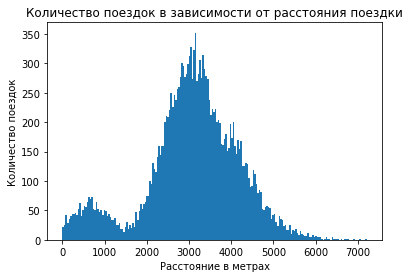

In [39]:
plt.hist(data_rides['distance'], bins=200)
plt.title('Количество поездок в зависимости от расстояния поездки')
plt.xlabel('Расстояние в метрах')
plt.ylabel('Количество поездок')
plt.show()

Среднее расстояние поездок - 3 070м. Наибольшее количество поездок совершено на расстояние от 2,5 км до 3,8 км.

In [40]:
data_rides['duration'].describe()

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

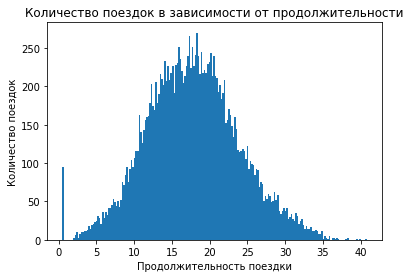

In [41]:
plt.hist(data_rides['duration'], bins=200)
plt.title('Количество поездок в зависимости от продолжительности')
plt.xlabel('Продолжительность поездки')
plt.ylabel('Количество поездок')
plt.show()

Средняя продолжительность поездки - 18 минут. Наибольшее количество поездок с продолжительностью от 12 до 22 минут. Самая короткая поездка - 0,5 минуты, самая продолжительная - 40,8 минуты.

### Шаг 4. Объединение данных

In [42]:
all_data = data_users.merge(data_rides)

In [43]:
all_data = all_data.merge(data_subscriptions_go)

In [44]:
all_data.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.92,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.59,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.16,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.78,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.69,26.265803,2021-08-28,8,6,0,199


In [45]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int64         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   distance           18068 non-null  float64       
 6   duration           18068 non-null  float64       
 7   date               18068 non-null  datetime64[ns]
 8   month              18068 non-null  int64         
 9   minute_price       18068 non-null  int64         
 10  start_ride_price   18068 non-null  int64         
 11  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 1.8+ MB


In [46]:
all_data_free = all_data.query('subscription_type == "free"')

In [47]:
all_data_free.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.69,14.944286,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.93,16.234663,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.43,20.016628,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.91,9.782872,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.38,17.427673,2021-02-14,2,8,50,0


In [48]:
all_data_ultra = all_data.query('subscription_type == "ultra"')

In [49]:
all_data_ultra.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.92,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.59,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.16,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.78,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.69,26.265803,2021-08-28,8,6,0,199


In [50]:
all_data_free['distance'].describe()

count    11568.000000
mean      3045.495284
std       1246.173810
min          0.860000
25%       2366.560000
50%       3114.650000
75%       3905.695000
max       7211.010000
Name: distance, dtype: float64

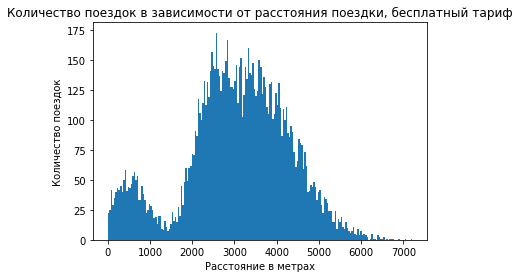

In [51]:
plt.hist(all_data_free['distance'], bins=200)
plt.title('Количество поездок в зависимости от расстояния поездки, бесплатный тариф')
plt.xlabel('Расстояние в метрах')
plt.ylabel('Количество поездок')
plt.show()

In [52]:
all_data_free['duration'].describe()

count    11568.000000
mean        17.390909
std          6.326803
min          0.500000
25%         12.958437
50%         17.326890
75%         21.594071
max         34.948498
Name: duration, dtype: float64

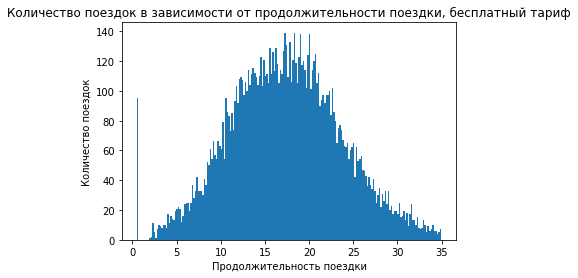

In [53]:
plt.hist(all_data_free['duration'], bins=200)
plt.title('Количество поездок в зависимости от продолжительности поездки, бесплатный тариф')
plt.xlabel('Продолжительность поездки')
plt.ylabel('Количество поездок')
plt.show()

In [54]:
all_data_ultra['distance'].describe()

count    6500.000000
mean     3115.445431
std       836.895369
min       244.210000
25%      2785.447500
50%      3148.640000
75%      3560.577500
max      5699.770000
Name: distance, dtype: float64

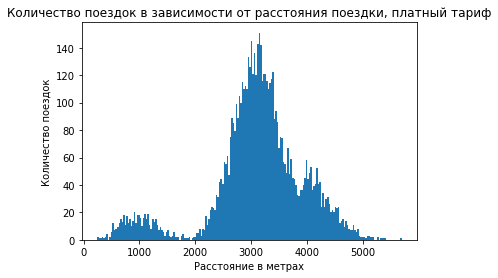

In [55]:
plt.hist(all_data_ultra['distance'], bins=200)
plt.title('Количество поездок в зависимости от расстояния поездки, платный тариф')
plt.xlabel('Расстояние в метрах')
plt.ylabel('Количество поездок')
plt.show()

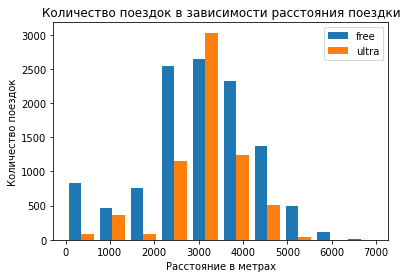

In [56]:
plt.hist([all_data_free['distance'],all_data_ultra['distance']], bins=10, range = (0, 7000), label=['free', 'ultra'])
plt.legend(loc='upper right')
plt.title('Количество поездок в зависимости расстояния поездки')
plt.xlabel('Расстояние в метрах')
plt.ylabel('Количество поездок')
plt.show()

In [57]:
all_data_ultra['duration'].describe()

count    6500.000000
mean       18.541985
std         5.572048
min         3.760353
25%        14.524654
50%        18.178153
75%        21.884129
max        40.823963
Name: duration, dtype: float64

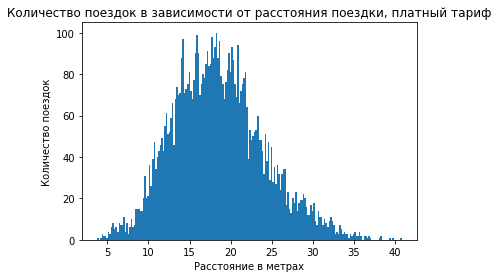

In [58]:
plt.hist(all_data_ultra['duration'], bins=200)
plt.title('Количество поездок в зависимости от расстояния поездки, платный тариф')
plt.xlabel('Расстояние в метрах')
plt.ylabel('Количество поездок')
plt.show()

Среднее расстояние по платному тарифу чуть больше (3 115м), чем по бесплатному(3 045м). Наибольшее количество поездок по бесплатному тарифу на расстояние от 2,4 км до 4 км. По платному тарифу - от 2,8 км до 3,6 км. Максимальное расстояние поездки по бесплатному тарифу - 7,2 км, по платному - 5,7 км.

Средняя продолжительность поездки по платному тарифу чуть больше (18,5 мин), чем по бесплатному(17,4 мин). Наибольшее количество поездок по бесплатному тарифу с продолжительностью от 13 мин до 21,6 мин. По платному тарифу - от 14,5 мин до 21,9 мин. Максимальная продолжительность поездки по бесплатному тарифу - 34,9 мин, по платному - 40,8 км.

Вывод: пользователи с платным тарифом совершают поездки на большее расстояние и с большей продолжительностью.

#### Шаг 5. Подсчёт выручки

In [59]:
all_data['duration'] = np.ceil(all_data['duration']) 

In [60]:
data_sum = all_data.pivot_table(
    index = ['month', 'user_id'], 
    values = ['distance', 'name', 'duration', 'minute_price', 'start_ride_price', 'subscription_fee'],
     aggfunc = {'distance': sum, 'name': len, 'duration':sum, 'minute_price': max,  'start_ride_price':max,
             'subscription_fee':max}).sort_values(by = 'month', ascending = True)
data_sum.rename(columns = {'name' : 'count'}, inplace = True)
data_sum.head(20)

distance  duration  minute_price  count  start_ride_price  \
month user_id                                                              
1     1         7027.51      42.0             6      2                 0   
      1061     12637.25      43.0             8      3                50   
      1063      3276.36      10.0             8      1                50   
      1064      5297.32      15.0             8      1                50   
      1065     14547.10      99.0             8      4                50   
      1066      2809.06      19.0             8      1                50   
      1067      3864.90      22.0             8      1                50   
      1069      7007.08      53.0             8      3                50   
      1071      3635.09      15.0             8      1                50   
      1072      2498.62      11.0             8      1                50   
      1073      2945.80      16.0             8      1                50   
      1074      2814.79      22.0             8      1                50   
      1075      5746.75      29.0             8      3                50   
      1077       114.04      13.0             8      1                50   
      1078      3748.22      19.0             8      1                50   
      1082      7250.13      30.0             8      2                50   
      1083      5848.88      31.0             8      2                50   
      1084      4615.10      25.0             8      1                50   
      1085     11410.54      63.0             8      3                50   
      1086      4044.28      18.0             8      1                50   

               subscription_fee  
month user_id                    
1     1                     199  
      1061                    0  
      1063                    0  
      1064                    0  
      1065                    0  
      1066                    0  
      1067                    0  
      1069                    0  
      1071                    0  
      1072                    0  
      1073                    0  
      1074                    0  
      1075                    0  
      1077                    0  
      1078                    0  
      1082                    0  
      1083                    0  
      1084                    0  
      1085                    0  
      1086                    0

In [61]:
data_sum.isna().sum()

distance            0
duration            0
minute_price        0
count               0
start_ride_price    0
subscription_fee    0
dtype: int64

Объединенная таблица не содержит пропуски

In [62]:
data_sum['revenue'] = data_sum['start_ride_price'] * data_sum['count'] + data_sum['minute_price'] * data_sum ['duration'] + data_sum['subscription_fee']
data_sum.head()

distance  duration  minute_price  count  start_ride_price  \
month user_id                                                              
1     1         7027.51      42.0             6      2                 0   
      1061     12637.25      43.0             8      3                50   
      1063      3276.36      10.0             8      1                50   
      1064      5297.32      15.0             8      1                50   
      1065     14547.10      99.0             8      4                50   

               subscription_fee  revenue  
month user_id                             
1     1                     199    451.0  
      1061                    0    494.0  
      1063                    0    130.0  
      1064                    0    170.0  
      1065                    0    992.0

In [63]:
data_sum['revenue'].sum()

3878641.0

Общая выручка сервиса составила 3 878 641 руб.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Правильно сделан раздел с  расчетом выручки. Молодец. 👍</font>

### Шаг 6. Проверка гипотез

 **6.1 Проверим гипотезу: тратят ли пользователи с подпиской больше времени на поездки**

Выдвинем гипотезы:

Н0: Средняя продолжительность поездок с подпиской и без равны

Н1: Средняя продолжительность поездок с подпиской больше продолжительности поездок без подписки

In [65]:
results = st.ttest_ind(
    all_data_ultra['duration'], all_data_free['duration'], alternative = 'greater')
print(results.pvalue)

alpha = 0.05
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

1.2804098316645618e-34
Отвергаем нулевую гипотезу


Нулевая гипотеза отвергнута, есть основания утверждать, что средняя продолжительность поездки с подпиской больше продолжительности поездок без подписки при установленном уровне значимости в 5 %.

**6.2 Проверим гипотезу: среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 
3130 метров.**

Выдвинем гипотезы:

Н0: Среднее расстояние, которое проезжают пользователи с подпиской равно 3130м

Н1: Среднее расстояние, которое проезжают пользователи с подпиской больше 3130м

In [66]:
distance = 3130
results = st.ttest_1samp(
    all_data_ultra['distance'], distance, alternative = 'greater')
print(results.pvalue)

alpha = 0.05
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.9195362605842414
Не получилось отвергнуть нулевую гипотезу


Нулевую гипотезу не удалось отвергнуть и следовательно, есть основания утверждать, что среднее расстояние поездки, пользователей с подпиской, не превышает оптимальное расстоянием в 3130 метров с точки зрения износа самоката, при установленном уровне значимости в 5 %.

**6.3 Проверим гипотезу: будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.** 

Выдвинем гипотезы:

Н0: Помесячная выручка от пользователей с подпиской по месяцам равна выручке от пользователей без подписки. 

Н1: Помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. 

In [67]:
results = st.ttest_ind(
    data_sum.loc[data_sum['subscription_fee'] > 0, 'revenue'], 
    data_sum.loc[data_sum['subscription_fee'] == 0, 'revenue'], 
    alternative = 'greater')
print(results.pvalue)

alpha = 0.05
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

1.8850394384715216e-31
Отвергаем нулевую гипотезу


Нулевая гипотеза отвергнута, есть основания утверждать, что помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки при установленном уровне значимости в 5 %.

**6.4 В ситуации, когда техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение и надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?**

Так как выборки парные (зависимые), то для проверки этой гипотезы буду использовать scipy.stats.ttest_rel() с аргументом alternative='less'

### Шаг 7. Общий вывод.

7.1 В результате выгрузки данных мы имеем 3 датасета. Датасет с пользователями содержит 1565 строк, пропусков нет. Датасет с пользователями содержит 18068 строк, пропусков нет. Датасет с подписками содержит 2 строки, пропусков нет.

7.2 В ходе предобработки данных пропущенные значения не выявлены. В данных о пользователях выявлен 31 дубликат. Дуюликаты удалены. В остальных файлах дубликатов не выявлено

7.3 Больше всего пользователей сервиса аренды самокатов в Пятигорске, меньше всего - в Москве

7.4 Пользователей без подписки больше и составляет 54,4%.

7.5 Наибольшее количество пользователей приходится на возраст с 21 до 28 лет. Средний возраст пользователей - 25 лет. Самые младшие пользователи - 12 лет, самые старшие - 43 года

7.6 Среднее расстояние поездок - 3 070м. Наибольшее количество поездок совершено на расстояние от 2,5 км до 3,8 км.

7.7 Средняя продолжительность поездки - 18 минут. Наибольшее количество поездок с продолжительностью от 12 до 22 минут. Самая короткая поездка - 0,5 минуты, самая продолжительная - 40,8 минуты.

7.8 Среднее расстояние по платному тарифу чуть больше (3 115м), чем по бесплатному(3 045м). Наибольшее количество поездок по бесплатному тарифу на расстояние от 2,4 км до 4 км. По платному тарифу - от 2,8 км до 3,6 км. Максимальное расстояние поездки по бесплатному тарифу - 7,2 км, по платному - 5,7 км.

7.9 Средняя продолжительность поездки по платному тарифу чуть больше (18,5 мин), чем по бесплатному(17,4 мин). Наибольшее количество поездок по бесплатному тарифу с продолжительностью от 13 мин до 21,6 мин. По платному тарифу - от 14,5 мин до 21,9 мин. Максимальная продолжительность поездки по бесплатному тарифу - 34,9 мин, по платному - 40,8 км.

7.10 Общая выручка сервиса составила 3 878 641 руб.

7.11 Гипотеза о том, что средняя продолжительность поездок с подпиской и без равны, отвергнута. Есть основания утверждать, что средняя продолжительность поездки с подпиской больше продолжительности поездок без подписки при установленном уровне значимости в 5 %.

7.12 Гипотезу о том, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, равно 3130 метров, не удалось отвергнуть, Следовательно, есть основания утверждать, что среднее расстояние поездки, пользователей с подпиской, не превышает оптимальное расстоянием в 3130 метров с точки зрения износа самоката, при установленном уровне значимости в 5 %.

7.13 Гипотеза о том, будет ли помесячная выручка от пользователей с подпиской по месяцам равна выручке от пользователей без подписки, отвергнута. Есть основания утверждать, что помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки при установленном уровне значимости в 5 %.


**Рекомендации**

Пользователи с подпиской являются более выгодными для сервиса. Соответственно руководству сервиса нужно приложить усилия для привлечения клиентов в платный контент.